# **Question-1**

Implement SIFT based image matching between 2 images and visualise the matched key points.

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load images

img1 = cv2.imread("image1.jpg", cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread("image2.jpg", cv2.IMREAD_GRAYSCALE)

if img1 is None or img2 is None:
    raise IOError("Error loading images")



In [ ]:
# SIFT detector

sift = cv2.SIFT_create(nfeatures=500)

kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)


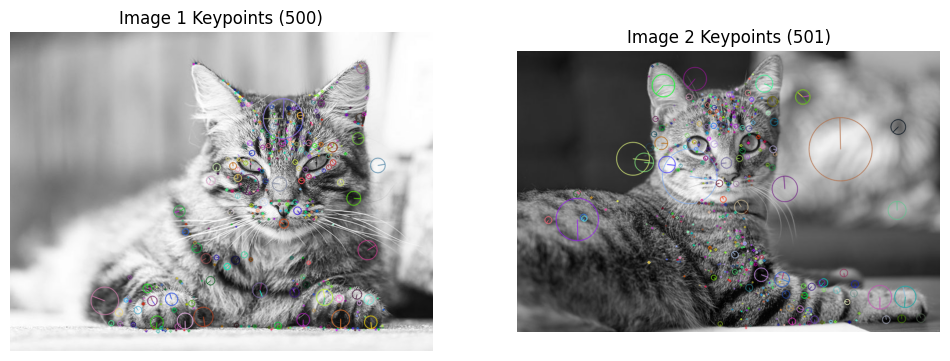

In [ ]:
# Visualize keypoints

kp_img1 = cv2.drawKeypoints(
    img1, kp1, None,
    flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS
)

kp_img2 = cv2.drawKeypoints(
    img2, kp2, None,
    flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS
)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(kp_img1, cmap="gray")
plt.title(f"Image 1 Keypoints ({len(kp1)})")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(kp_img2, cmap="gray")
plt.title(f"Image 2 Keypoints ({len(kp2)})")
plt.axis("off")
plt.show()


In [ ]:
# Feature Matching (KNN + Ratio Test)

bf = cv2.BFMatcher(cv2.NORM_L2)
matches = bf.knnMatch(des1, des2, k=2)

good_matches = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good_matches.append(m)

print(f"Good matches after ratio test: {len(good_matches)}")



Good matches after ratio test: 9


In [ ]:
# RANSAC Homography Filtering

if len(good_matches) > 10:
    src_pts = np.float32([kp1[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2)
    dst_pts = np.float32([kp2[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2)

    H, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)
    matches_mask = mask.ravel().tolist()
else:
    matches_mask = None


In [ ]:
# Draw inlier matches only

draw_params = dict(
    matchColor=(0, 255, 0),   # Green matches
    singlePointColor=(255, 0, 0),
    matchesMask=matches_mask,
    flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS
)

matched_img = cv2.drawMatches(
    img1, kp1,
    img2, kp2,
    good_matches,
    None,
    **draw_params
)

matched_img = cv2.cvtColor(matched_img, cv2.COLOR_BGR2RGB)

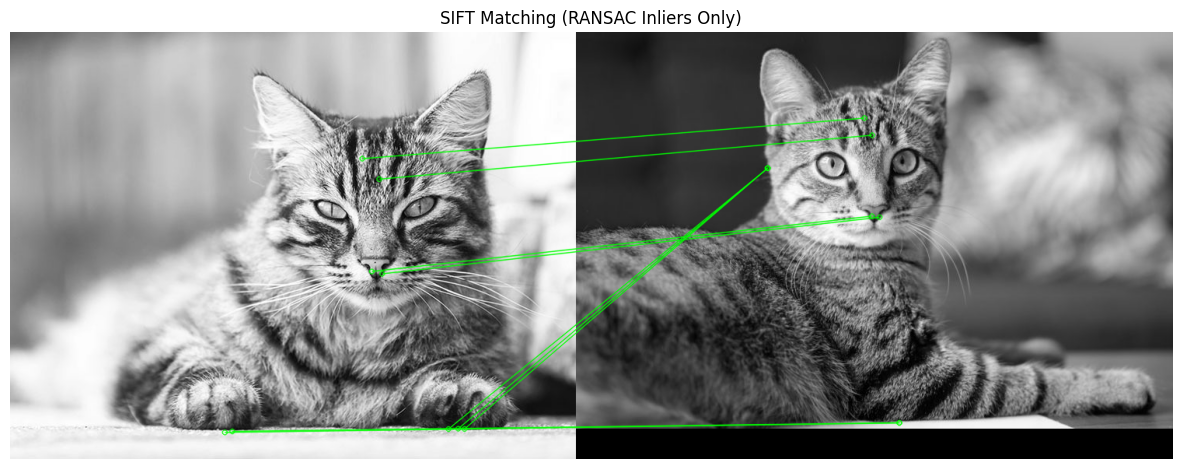

In [ ]:
# Final Visualization

plt.figure(figsize=(15, 7))
plt.imshow(matched_img)
plt.title("SIFT Matching (RANSAC Inliers Only)")
plt.axis("off")
plt.show()